In [11]:
#import important libraries that we will be using in our file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Here we extract the crypto data from the api URL and save it in data

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-01-03T08:21:15.153Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 8983}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10690, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [13]:
type(data)

dict

In [14]:
#this will allow you see all the rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [15]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-01-03T08:21:15.153Z,0,None,18,1,None,8983


In [16]:
#here we normalize data by adding a dataframe to it we also add a timestamp
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10690,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.958829e+07,1.958829e+07,False,NaN,1,NaN,NaN,None,2024-01-03T08:19:00.000Z,45187.138622,3.059780e+10,5.4375,-0.365857,-1.238592,6.433891,9.196646,29.637279,63.702169,8.851389e+11,51.0948,9.489299e+11,None,2024-01-03T08:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 08:21:15.399890+00:00
1,1027,Ethereum,ETH,ethereum,8166,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201855e+08,1.201855e+08,True,NaN,2,NaN,NaN,None,2024-01-03T08:19:00.000Z,2370.134781,1.141686e+10,23.8587,-0.380241,-1.268235,6.095241,5.717655,28.611629,44.888694,2.848558e+11,16.4473,2.848558e+11,None,2024-01-03T08:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 08:21:15.399890+00:00
2,825,Tether USDt,USDT,tether,70383,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.204799e+10,9.460306e+10,True,NaN,3,NaN,NaN,None,2024-01-03T08:19:00.000Z,1.000588,5.165781e+10,12.7071,0.012409,-0.014483,0.047490,0.063388,-0.021905,0.057622,9.210214e+10,5.3166,9.465871e+10,None,2024-01-03T08:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-03 08:21:15.399890+00:00
3,1839,BNB,BNB,bnb,1969,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516918e+08,1.516918e+08,False,NaN,4,NaN,NaN,None,2024-01-03T08:19:00.000Z,318.118066,1.109948e+09,15.2572,-0.370599,-0.063780,8.171965,36.690440,36.298710,49.823618,4.825590e+10,2.7862,4.825590e+10,None,2024-01-03T08:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 08:21:15.399890+00:00
4,5426,Solana,SOL,solana,610,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.300160e+08,5.662183e+08,True,NaN,5,NaN,NaN,None,2024-01-03T08:19:00.000Z,108.422827,3.227722e+09,8.8204,-1.151477,-5.205124,-2.530271,69.600541,157.324220,372.270667,4.662355e+10,2.6920,6.139099e+10,None,2024-01-03T08:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 08:21:15.399890+00:00
5,52,XRP,XRP,xrp,1194,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.412515e+10,9.998810e+10,False,NaN,6,NaN,NaN,None,2024-01-03T08:19:00.000Z,0.633094,1.365510e+09,49.4494,-0.465327,0.291391,1.831643,-0.269157,2.681985,20.932580,3.426631e+10,1.9785,6.330941e+10,None,2024-01-03T08:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 08:21:15.399890+00:00
6,3408,USDC,USDC,usd-coin,15938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.479758e+10,2.479758e+10,False,NaN,7,NaN,NaN,None,2024-01-03T08:19:00.000Z,1.000243,6.292084e+09,24.8009,0.003232,0.040200,0.020854,0.072525,-0.011219,0.024895,2.480361e+10,1.4321,2.480361e+10,None,2024-01-03T08:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-03 08:21:15.399890+00:00
7,2010,Cardano,ADA,cardano,1018,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.536796e+10,3.649892e+10,False,NaN,8,NaN,NaN,None,2024-01-03T08:19:00.000Z,0.612980,5.439545e+08,10.0666,-0.415382,-2.432417,2.618852,50.147187,87.534590,138.170753,2.167984e+10,1.2515,2.758408e+10,None,2024-01-03T08:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 08:21:15.399890+00:00
8,5805,Avalanche,AVAX,avalanche,628,2020-07-13T00:00:00.000Z,"[defi, sm

In [21]:
#here we create an automating crypto data pull function

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
  

    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now', utc=True)
    #df = pd.concat([df, df2], ignore_index=True)
    
    #modifying the above to this to avoid duplicates
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df 
    
    #putting it in a csv file
    if not os.path.isfile(r'C:\Users\Admin\Documents\Python Tutorials\API.csv'):
        df.to_csv(r'C:\Users\Admin\Documents\Python Tutorials\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Admin\Documents\Python Tutorials\API.csv', mode='a', header=False)    
        

In [22]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(60) #sleep for a minute
exit()

API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [23]:
df72 = pd.read_csv(r'C:\Users\Admin\Documents\Python Tutorials\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10690,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.958829e+07,1.958829e+07,False,NaN,1,NaN,NaN,NaN,2024-01-03T09:00:00.000Z,45214.196033,2.982004e+10,-1.4238,0.365928,-1.266260,5.819494,8.440357,29.683274,63.440512,8.856689e+11,51.0954,9.494981e+11,NaN,2024-01-03T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:01:54.098604+00:00
1,1,1027,Ethereum,ETH,ethereum,8166,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201855e+08,1.201855e+08,True,NaN,2,NaN,NaN,NaN,2024-01-03T09:00:00.000Z,2371.278313,1.084712e+10,8.5031,0.334107,-2.318429,5.444311,5.120743,28.838899,44.677884,2.849933e+11,16.4469,2.849933e+11,NaN,2024-01-03T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:01:54.098604+00:00
2,2,825,Tether USDt,USDT,tether,70383,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.204799e+10,9.460306e+10,True,NaN,3,NaN,NaN,NaN,2024-01-03T09:00:00.000Z,1.000389,5.051621e+10,6.0979,-0.012960,-0.043189,0.019747,0.007604,-0.015818,0.025490,9.208376e+10,5.3124,9.463982e+10,NaN,2024-01-03T09:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-03 09:01:54.098604+00:00
3,3,1839,BNB,BNB,bnb,1969,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.516918e+08,1.516918e+08,False,NaN,4,NaN,NaN,NaN,2024-01-03T09:00:00.000Z,318.953569,1.116544e+09,14.8249,0.679558,-0.294412,7.739953,36.724511,36.291054,49.986532,4.838264e+10,2.7921,4.838264e+10,NaN,2024-01-03T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:01:54.098604+00:00
4,4,5426,Solana,SOL,solana,610,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.300160e+08,5.662183e+08,True,NaN,5,NaN,NaN,NaN,2024-01-03T09:00:00.000Z,108.391128,3.165350e+09,3.2350,0.515587,-5.504050,-4.250927,68.792285,158.099597,371.086004,4.660992e+10,2.6898,6.137304e+10,NaN,2024-01-03T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:01:54.098604+00:00
5,5,52,XRP,XRP,xrp,1194,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.412515e+10,9.998810e+10,False,NaN,6,NaN,NaN,NaN,2024-01-03T09:00:00.000Z,0.632178,1.352838e+09,41.4737,-0.161522,-0.207113,1.095639,-1.039351,2.504467,20.705948,3.421671e+10,1.9746,6.321776e+10,NaN,2024-01-03T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:01:54.098604+00:00
6,6,3408,USDC,USDC,usd-coin,15940,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.479758e+10,2.479758e+10,False,NaN,7,NaN,NaN,NaN,2024-01-03T09:00:00.000Z,1.000094,6.148611e+09,16.9316,-0.015222,0.025247,-0.012492,0.012300,-0.010350,0.005218,2.479990e+10,1.4312,2.479990e+10,NaN,2024-01-03T09:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-03 09:01:54.098604+00:00
7,7,2010,Cardano,ADA,cardano,1018,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.536796e+10,3.649892e+10,False,NaN,8,NaN,NaN,NaN,2024-01-03T09:00:00.000Z,0.613588,5.369292e+08,5.7365,0.459043,-3.104150,1.467618,48.318230,87.501608,138.329329,2.170137e+10,1.2520,2.761147e+10,NaN,2024-01-03T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:01:54.098604+00:00
8,8,5805,Avalanche,AVAX,avalanche,628,2020-07-13T00:00:00.000Z,

In [ ]:
#continuation after the automationg and adding it to csv file

In [25]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10690,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.958829e+07,1.958829e+07,False,NaN,1,NaN,NaN,None,2024-01-03T09:03:00.000Z,45255.958873,2.975501e+10,-1.6899,0.414605,-1.256385,5.966891,8.392104,29.734510,63.591477,8.864870e+11,51.0671,9.503751e+11,None,2024-01-03T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:04:57.990935+00:00
1,1027,Ethereum,ETH,ethereum,8166,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201855e+08,1.201855e+08,True,NaN,2,NaN,NaN,None,2024-01-03T09:03:00.000Z,2373.468860,1.082964e+10,8.2399,0.397021,-2.096464,5.548808,5.074401,28.914418,44.811535,2.852565e+11,16.4328,2.852565e+11,None,2024-01-03T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:04:57.990935+00:00
2,825,Tether USDt,USDT,tether,70383,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.204799e+10,9.460306e+10,True,NaN,3,NaN,NaN,None,2024-01-03T09:03:00.000Z,1.000399,5.041429e+10,5.8551,-0.023228,-0.042794,-0.000972,0.005281,-0.018933,0.026524,9.208471e+10,5.3046,9.464080e+10,None,2024-01-03T09:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-03 09:04:57.990935+00:00
3,1839,BNB,BNB,bnb,1969,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516918e+08,1.516918e+08,False,NaN,4,NaN,NaN,None,2024-01-03T09:03:00.000Z,319.072024,1.114496e+09,14.8413,0.610462,-0.266218,7.897531,36.752966,36.223562,50.042235,4.840060e+10,2.7882,4.840060e+10,None,2024-01-03T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:04:57.990935+00:00
4,5426,Solana,SOL,solana,610,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.300160e+08,5.662183e+08,True,NaN,5,NaN,NaN,None,2024-01-03T09:03:00.000Z,108.406879,3.136074e+09,2.6298,0.503542,-5.432351,-3.901859,68.780956,157.959248,371.154459,4.661669e+10,2.6854,6.138196e+10,None,2024-01-03T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:04:57.990935+00:00
5,52,XRP,XRP,xrp,1194,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.412515e+10,9.998810e+10,False,NaN,6,NaN,NaN,None,2024-01-03T09:03:00.000Z,0.632062,1.346362e+09,40.6746,-0.093382,-0.229943,1.110710,-1.082376,2.431370,20.683865,3.421045e+10,1.9708,6.320619e+10,None,2024-01-03T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:04:57.990935+00:00
6,3408,USDC,USDC,usd-coin,15940,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.479758e+10,2.479758e+10,False,NaN,7,NaN,NaN,None,2024-01-03T09:03:00.000Z,1.000127,6.153288e+09,17.0505,-0.015925,0.013014,-0.016345,0.014296,-0.006547,0.008568,2.480074e+10,1.4287,2.480074e+10,None,2024-01-03T09:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-03 09:04:57.990935+00:00
7,2010,Cardano,ADA,cardano,1018,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.536796e+10,3.649892e+10,False,NaN,8,NaN,NaN,None,2024-01-03T09:03:00.000Z,0.613908,5.353732e+08,5.4001,0.548409,-3.030417,1.627181,48.407105,87.569852,138.453374,2.171266e+10,1.2508,2.762585e+10,None,2024-01-03T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:04:57.990935+00:00
8,5805,Avalanche,AVAX,avalanche,628,2020-07-13T00:00:00.000Z,"[defi, smar

In [26]:
#change the numbers that is abbreviated in scientific Notation to make them more readerble
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10690,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19588293.00000,19588293.00000,False,NaN,1,NaN,NaN,None,2024-01-03T09:03:00.000Z,45255.95887,29755007797.26525,-1.68990,0.41460,-1.25638,5.96689,8.39210,29.73451,63.59148,886486982407.10535,51.06710,950375136340.31995,None,2024-01-03T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:04:57.990935+00:00
1,1027,Ethereum,ETH,ethereum,8166,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120185495.51593,120185495.51593,True,NaN,2,NaN,NaN,None,2024-01-03T09:03:00.000Z,2373.46886,10829635650.86772,8.23990,0.39702,-2.09646,5.54881,5.07440,28.91442,44.81153,285256531079.50739,16.43280,285256531079.51001,None,2024-01-03T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:04:57.990935+00:00
2,825,Tether USDt,USDT,tether,70383,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,92047993063.19923,94603058344.82516,True,NaN,3,NaN,NaN,None,2024-01-03T09:03:00.000Z,1.00040,50414288178.69789,5.85510,-0.02323,-0.04279,-0.00097,0.00528,-0.01893,0.02652,92084714153.17445,5.30460,94640798737.66000,None,2024-01-03T09:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-03 09:04:57.990935+00:00
3,1839,BNB,BNB,bnb,1969,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151691782.86671,151691782.86671,False,NaN,4,NaN,NaN,None,2024-01-03T09:03:00.000Z,319.07202,1114496490.29485,14.84130,0.61046,-0.26622,7.89753,36.75297,36.22356,50.04224,48400604232.13002,2.78820,48400604232.13000,None,2024-01-03T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:04:57.990935+00:00
4,5426,Solana,SOL,solana,610,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,430016016.57923,566218338.51557,True,NaN,5,NaN,NaN,None,2024-01-03T09:03:00.000Z,108.40688,3136073857.73068,2.62980,0.50354,-5.43235,-3.90186,68.78096,157.95925,371.15446,46616694266.03694,2.68540,61381962896.12000,None,2024-01-03T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:04:57.990935+00:00
5,52,XRP,XRP,xrp,1194,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54125149173.00000,99988100379.00000,False,NaN,6,NaN,NaN,None,2024-01-03T09:03:00.000Z,0.63206,1346361914.56152,40.67460,-0.09338,-0.22994,1.11071,-1.08238,2.43137,20.68386,34210446006.71232,1.97080,63206192554.53000,None,2024-01-03T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-03 09:04:57.990935+00:00
6,3408,USDC,USDC,usd-coin,15940,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24797581826.44911,24797581826.44911,False,NaN,7,NaN,NaN,None,2024-01-03T09:03:00.000Z,1.00013,6153287700.88578,17.05050,-0.01592,0.01301,-0.01634,0.01430,-0.00655,0.00857,24800735380.89275,1.42870,24800735380.89000,None,2024-01-03T09:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-03 09:04:57.990935+00:00
7,2010,Cardano,ADA,cardano,1018,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35367963156.03800,36498916808.90700,False,NaN,8,NaN,NaN,None,2024-01-03T09:03:00.000Z,0.61391,535373201.12992,5.40010,0.54841,-3.03042,1.62718,48.40711,87.56985,138.45337,21712663870.09675,1.25080,27625845170.7

In [28]:
# we are "groupingby" name to avoid having a different data
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.41460,-1.25638,5.96689,8.39210,29.73451,63.59148
Ethereum,0.39702,-2.09646,5.54881,5.07440,28.91442,44.81153
Tether USDt,-0.02323,-0.04279,-0.00097,0.00528,-0.01893,0.02652
BNB,0.61046,-0.26622,7.89753,36.75297,36.22356,50.04224
Solana,0.50354,-5.43235,-3.90186,68.78096,157.95925,371.15446
XRP,-0.09338,-0.22994,1.11071,-1.08238,2.43137,20.68386
USDC,-0.01592,0.01301,-0.01634,0.01430,-0.00655,0.00857
Cardano,0.54841,-3.03042,1.62718,48.40711,87.56985,138.45337
Avalanche,0.51257,-5.07824,-6.87946,80.58207,238.81435,306.52210


In [29]:
#for us to be able to visualize it we need to turn our percentages which are in columns to row 
#that is why we are stacking them
df4 =df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.41460
             quote.USD.percent_change_24h    -1.25638
             quote.USD.percent_change_7d      5.96689
             quote.USD.percent_change_30d     8.39210
             quote.USD.percent_change_60d    29.73451
             quote.USD.percent_change_90d    63.59148
Ethereum     quote.USD.percent_change_1h      0.39702
             quote.USD.percent_change_24h    -2.09646
             quote.USD.percent_change_7d      5.54881
             quote.USD.percent_change_30d     5.07440
             quote.USD.percent_change_60d    28.91442
             quote.USD.percent_change_90d    44.81153
Tether USDt  quote.USD.percent_change_1h     -0.02323
             quote.USD.percent_change_24h    -0.04279
             quote.USD.percent_change_7d     -0.00097
             quote.USD.percent_change_30d     0.00528
             quote.USD.percent_change_60d    -0.01893
             quote.USD.percent_change_90

In [31]:
#bcoz we stack it, it then changes our data from dataframe to series
type(df3)
type(df4)

pandas.core.series.Series

In [32]:
#we cant be able to use it in series so we have to convert it to dataframe
df5 = df4.to_frame(name='value')
df5

value
name                                              
Bitcoin     quote.USD.percent_change_1h    0.41460
            quote.USD.percent_change_24h  -1.25638
            quote.USD.percent_change_7d    5.96689
            quote.USD.percent_change_30d   8.39210
            quote.USD.percent_change_60d  29.73451
            quote.USD.percent_change_90d  63.59148
Ethereum    quote.USD.percent_change_1h    0.39702
            quote.USD.percent_change_24h  -2.09646
            quote.USD.percent_change_7d    5.54881
            quote.USD.percent_change_30d   5.07440
            quote.USD.percent_change_60d  28.91442
            quote.USD.percent_change_90d  44.81153
Tether USDt quote.USD.percent_change_1h   -0.02323
            quote.USD.percent_change_24h  -0.04279
            quote.USD.percent_change_7d   -0.00097
            quote.USD.percent_change_30d   0.00528
            quote.USD.percent_change_60d  -0.01893
            quote.USD.percent_change_90d   0.02652
BNB         quote.USD.percent_change_1h    0.61046
            quote.USD.percent_change_24h  -0.26622
            quote.USD.percent_change_7d    7.89753
            quote.USD.percent_change_30d  36.75297
            quote.USD.percent_change_60d  36.22356
            quote.USD.percent_change_90d  50.04224
Solana      quote.USD.percent_change_1h    0.50354
            quote.USD.percent_change_24h  -5.43235
            quote.USD.percent_change_7d   -3.90186
            quote.USD.percent_change_30d  68.78096
            quote.USD.percent_change_60d 157.95925
            quote.USD.percent_change_90d 371.15446
XRP         quote.USD.percent_change_1h   -0.09338
            quote.USD.percent_change_24h  -0.22994
            quote.USD.percent_change_7d    1.11071
            quote.USD.percent_change_30d  -1.08238
            quote.USD.percent_change_60d   2.43137
            quote.USD.percent_change_90d  20.68386
USDC        quote.USD.percent_change_1h   -0.01592
            quote.USD.percent_change_24h   0.01301
            quote.USD.percent_change_7d   -0.01634
            quote.USD.percent_change_30d   0.01430
            quote.USD.percent_change_60d  -0.00655
            quote.USD.percent_change_90d   0.00857
Cardano     quote.USD.percent_change_1h    0.54841
            quote.USD.percent_change_24h  -3.03042
            quote.USD.percent_change_7d    1.62718
            quote.USD.percent_change_30d  48.40711
            quote.USD.percent_change_60d  87.56985
            quote.USD.percent_change_90d 138.45337
Avalanche   quote.USD.percent_change_1h    0.51257
            quote.USD.percent_change_24h  -5.07824
            quote.USD.percent_change_7d   -6.87946
            quote.USD.percent_change_30d  80.58207
            quote.USD.percent_change_60d 238.81435
            quote.USD.percent_change_90d 306.52210
Dogecoin    quote.USD.percent_change_1h    0.18889
            quote.USD.percent_change_24h  -2.51831
            quote.USD.percent_change_7d   -0.21322
            quote.USD.percent_change_30d   1.52958
            quote.USD.percent_change_60d  33.38336
            quote.USD.percent_change_90d  50.47990
Polkadot    quote.USD.percent_change_1h    0.49686
            quote.USD.percent_change_24h  -2.74650
            quote.USD.percent_change_7d   -5.16374
            quote.USD.percent_change_30d  49.35144
            quote.USD.percent_change_60d  82.31131
            quote.USD.percent_change_90d 110.44228
TRON        quote.USD.percent_change_1h    0.40928
            quote.USD.percent_change_24h  -0.00205
            quote.USD.percent_change_7d    5.61230
            quote.USD.percent_change_30d   4.40085
            quote.USD.percent_change_60d  12.12758
            quote.USD.percent_change_90d  22.84560
Polygon     quote.USD.percent_change_1h    0.40615
            quote.USD.percent_change_24h  -4.20732
            quote.USD.percent_change_7d   -6.76643
            quote.USD.percent_change_30d  18.34215
            quote.USD.percent_change_60d  45.69443
            quot

In [33]:
#it has been converted to dataframe
type(df5)

pandas.core.frame.DataFrame

In [34]:
#the name is acting like an index which we dont want so we need to give it an index
#so we need to create an index but we need to know the numbers of row we have in there

df5.count()

value    90
dtype: int64

In [37]:
#adding the index
index = pd.Index(range(90))

df6 = df5.set_index(index)
df6

,value
0,0.41460
1,-1.25638
2,5.96689
3,8.39210
4,29.73451
5,63.59148
6,0.39702
7,-2.09646
8,5.54881
9,5.07440


In [38]:
#reseting the index
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,value
0,Bitcoin,quote.USD.percent_change_1h,0.41460
1,Bitcoin,quote.USD.percent_change_24h,-1.25638
2,Bitcoin,quote.USD.percent_change_7d,5.96689
3,Bitcoin,quote.USD.percent_change_30d,8.39210
4,Bitcoin,quote.USD.percent_change_60d,29.73451
5,Bitcoin,quote.USD.percent_change_90d,63.59148
6,Ethereum,quote.USD.percent_change_1h,0.39702
7,Ethereum,quote.USD.percent_change_24h,-2.09646
8,Ethereum,quote.USD.percent_change_7d,5.54881
9,Ethereum,quote.USD.percent_change_30d,5.07440


In [39]:
#Renaming the column name level_1 to percentage_change
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,value
0,Bitcoin,quote.USD.percent_change_1h,0.41460
1,Bitcoin,quote.USD.percent_change_24h,-1.25638
2,Bitcoin,quote.USD.percent_change_7d,5.96689
3,Bitcoin,quote.USD.percent_change_30d,8.39210
4,Bitcoin,quote.USD.percent_change_60d,29.73451
5,Bitcoin,quote.USD.percent_change_90d,63.59148
6,Ethereum,quote.USD.percent_change_1h,0.39702
7,Ethereum,quote.USD.percent_change_24h,-2.09646
8,Ethereum,quote.USD.percent_change_7d,5.54881
9,Ethereum,quote.USD.percent_change_30d,5.07440


In [ ]:
#now lets use this to visualize the change over the time period

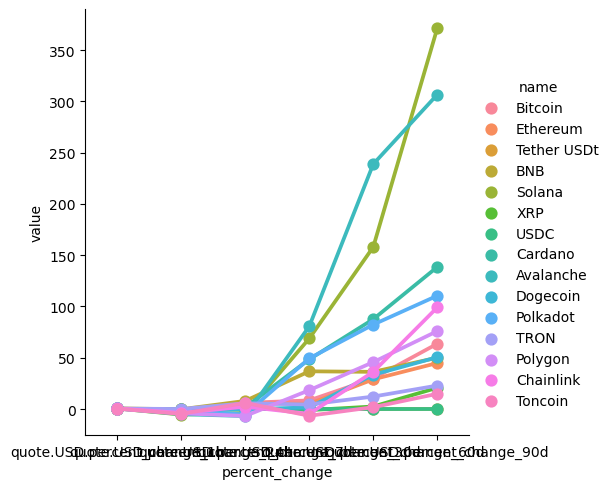

In [40]:
sns.catplot(x='percent_change', y='value', hue='name', data=df7, kind='point')

In [41]:
#change the name of the percent_change to enable us have a good view in visualization
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'],)
df7

,name,percent_change,value
0,Bitcoin,1h,0.41460
1,Bitcoin,24h,-1.25638
2,Bitcoin,7d,5.96689
3,Bitcoin,30d,8.39210
4,Bitcoin,60d,29.73451
5,Bitcoin,90d,63.59148
6,Ethereum,1h,0.39702
7,Ethereum,24h,-2.09646
8,Ethereum,7d,5.54881
9,Ethereum,30d,5.07440


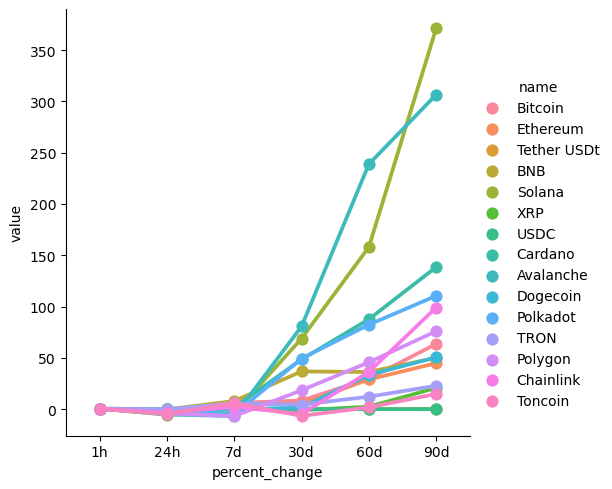

In [42]:
sns.catplot(x='percent_change', y='value', hue='name', data=df7, kind='point')

In [55]:
#lets do something simpler lets say bitcoin over that time we took the data in
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,45255.95887,2024-01-03 09:04:57.990935+00:00
1,Ethereum,2373.46886,2024-01-03 09:04:57.990935+00:00
2,Tether USDt,1.00040,2024-01-03 09:04:57.990935+00:00
3,BNB,319.07202,2024-01-03 09:04:57.990935+00:00
4,Solana,108.40688,2024-01-03 09:04:57.990935+00:00
5,XRP,0.63206,2024-01-03 09:04:57.990935+00:00
6,USDC,1.00013,2024-01-03 09:04:57.990935+00:00
7,Cardano,0.61391,2024-01-03 09:04:57.990935+00:00
8,Avalanche,40.96663,2024-01-03 09:04:57.990935+00:00
9,Dogecoin,0.09187,2024-01-03 09:04:57.990935+00:00


In [53]:
#lets do something simpler lets say bitcoin over that time we took the data in
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,45255.95887,2024-01-03 09:04:57.990935+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

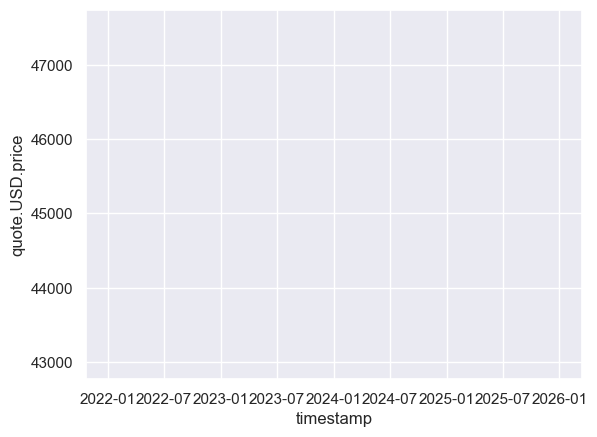

In [49]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)